In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, preprocessing, metrics
import matplotlib.pyplot as plt


#read data set from file wdbc.dataset
wdbcdata = pd.read_csv('wdbc.dataset',header=None)

#separating the Y vector, dropping the id column. The values of the Diagnosis column will be used as our predictor variable.

Y_data = wdbcdata.iloc[:][1]
X_data = wdbcdata.drop(columns=[0,1])

#resetting the column indices for the feature matrix
X_data.columns = list(range(30))


#replace values 'M' with 1 and 'B' with 0 respectively in the first column
Y_data.replace(to_replace='M',value=1,inplace=True)
Y_data.replace(to_replace='B',value=0,inplace=True)


# using sklearn train_test_split randomise and split the data into:
# 80% : train
# 10% test
# 10%: validate

X_train,X_test_and_validate,Y_train,Y_test_and_validate =\
model_selection.train_test_split(X_data,Y_data,train_size = .8)

#splitting remaining data as test data and validate data
X_test,X_validate,Y_test,Y_validate =\
model_selection.train_test_split(X_test_and_validate,Y_test_and_validate, train_size = .50)


#normalise the partitioned features sets for training data, testing data and validation data

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_scaled)

x_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_scaled)

x_scaled = min_max_scaler.fit_transform(X_validate)
X_validate = pd.DataFrame(x_scaled)

#reset index of y columns to match x columns
Y_train = pd.DataFrame(Y_train).reset_index(drop=True)
Y_test = pd.DataFrame(Y_test).reset_index(drop=True)
Y_validate = pd.DataFrame(Y_validate).reset_index(drop=True)


#setting the seed value for random weights generated
np.random.seed(42)

In [2]:
#Defining sigmoid function to map value to 0 or 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
#define a function to train the model
def train_model(epochs, learning_rate):
    
    #array to hold the loss values
    loss = []
    
    #array to hold the validation loss values
    val_loss = []
    
    #array to hold the accuracy scores for training data
    train_accuracy = []
    
    #array to hold the accuracy scores for validation data
    validate_accuracy = []    
    
    #training data
    X = X_train.T
    Y = Y_train.values.reshape(1, Y_train.shape[0])
    number_of_samples = X.shape[1]
    
    #validation data
    X_val = X_validate.T
    Y_val = Y_validate.values.reshape(1, Y_validate.shape[0])
    number_of_val_samples = X_val.shape[1]

    
    #define weight matrix and bias
    w = np.random.randn(X.shape[0], 1)
    b = 0

    for epoch in range(epochs):
        
        #z = WX + b
        z = np.dot(w.T, X) + b
        
        
        #define predictor function for training data
        p = sigmoid(z)
        
        
        #calculate the cost at each epoch and update the loss list for training data
        cost_training = -np.sum(np.multiply(Y,np.log(p)) + np.multiply((1-Y), np.log(1-p)))/number_of_samples
       
        
        #calculate predicted values to plot accuracy score vs Epoch for training data
        train_predict = [1 if (each >= 0.5) else 0 for each in p.flatten()]
        
        loss.append(cost_training.squeeze())        
        
        train_accuracy.append(metrics.accuracy_score(y_true = Y.flatten(),y_pred = train_predict))
                        
        #calculate the gradient and gradient descent    
        dz = p-Y
        dw = np.dot(X, dz.T)/number_of_samples
        db = np.sum(dz)/number_of_samples
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        
        #Validating the new values of hyperparameters using validation data
        z_val = np.dot(w.T, X_val) + b
        p_val = sigmoid(z_val)
        cost_validating = -np.sum(np.multiply(Y_val, np.log(p_val)) + np.multiply((1-Y_val), np.log(1-p_val)))/number_of_val_samples
        validate_predict = [1 if (each >= 0.5) else 0 for each in p_val.flatten()]
        val_loss.append(cost_validating.squeeze())
        validate_accuracy.append(metrics.accuracy_score(y_true = Y_val.flatten(), y_pred = validate_predict))
    

    #plot Loss vs Epoch for Training and Validation data sets
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Loss VS Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss'], loc = 'upper right')
    plt.show()

    #plot Accuracy vs Epoch for Training and Validation data sets
    plt.plot(train_accuracy)
    plt.plot(validate_accuracy)
    plt.title('Accuracy VS Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'lower right')
    plt.show()
    
    #printing the final cost value for training and validation
    print("\nFinal value of cost for Training data: {0}".format(cost_training))
    
    print("\nFinal value of cost for Validation data: {0}".format(cost_validating))
    
    return w, b

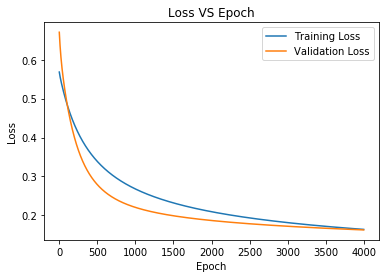

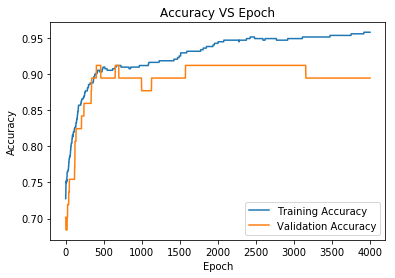


Final value of cost for Training data: 0.163719159665283

Final value of cost for Validation data: 0.1623870775338209


In [4]:
#for an epoch value of 4000 learning rate of 0.07
w, b = train_model(4000, 0.07)

In [5]:
#testing the parameters derived from training against the test data

print("\n W = \n {0}, \n\nb = {1}".format(w, b))


#Metrics shown below are for epoch value of 4000 and learning rate of 0.07

Y_test_prediction = np.dot(w.T, X_test.T) + b
Y_test_result = [1 if each >= 0.5 else 0 for each in Y_test_prediction.flatten()]


# Performance Metrics:
accuracy = metrics.accuracy_score(y_true=Y_test, y_pred=Y_test_result)
precision = metrics.precision_score(y_true=Y_test, y_pred=Y_test_result)
recall = metrics.recall_score(y_true=Y_test, y_pred=Y_test_result)

print("\nAccuracy Score = {0}\n Precision = {1}\n Recall = {2}\n".format(accuracy, precision, recall))


 W = 
 [[ 0.93523232]
 [ 0.99443507]
 [ 1.19879153]
 [ 2.37959822]
 [-0.79170385]
 [ 0.61807785]
 [ 3.75124345]
 [ 3.11063631]
 [-0.68098024]
 [-0.62606123]
 [ 0.77317611]
 [-0.44683564]
 [ 1.26398661]
 [-1.0358544 ]
 [-1.66516787]
 [-0.50200765]
 [-1.02056987]
 [ 0.42460216]
 [-0.94748148]
 [-1.64018606]
 [ 2.85451037]
 [ 1.3848583 ]
 [ 1.4232341 ]
 [-0.07435318]
 [ 0.52214809]
 [ 1.32592855]
 [ 0.55170682]
 [ 2.7540049 ]
 [ 0.34295688]
 [ 0.13094861]], 

b = -5.975953828829845

Accuracy Score = 0.9824561403508771
 Precision = 0.9583333333333334
 Recall = 1.0



<h1> Printing Metrices </h1>

<h2> ${Accuracy\ Score} =  \frac{TP+TN}{TP+TN+FP+FN}$ </h2>  <h4>where,  TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative <h4>

In [6]:
accuracy

0.9824561403508771

<h2> ${Precision} =  \frac{TP}{TP+FP}$ </h2>  <h4> where,  TP = True Positive, FP = False Positive<h4>

In [7]:
precision

0.9583333333333334

<h2> ${Recall} =  \frac{TP}{TP+FN}$ </h2>  <h4> where,  TP = True Positive, FN = False Negative <h4>

In [8]:
recall

1.0